In [20]:
using Images
using Colors
using FileIO
using Interpolations
using Plots

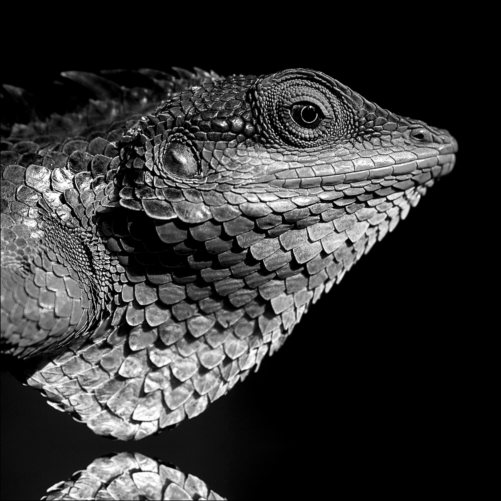

In [24]:
# specify the path to your local image file and load it:
img_path = "./images/input/lizard.jpg"
img = load(img_path)
img_grey = Gray{Float32}.(img)

# Hough transform most simple example
detecting one line:

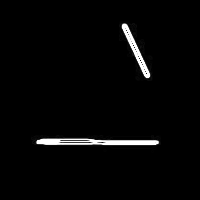

In [150]:
include("imageops.jl")
img = load("./images/input/geom2.jpg")
img = Gray{Float32}.(img)
img = sobel(img)

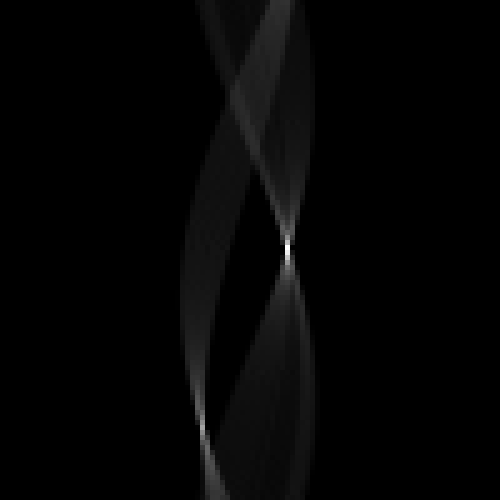

In [152]:
acc_matrix = hugh_transform_accumulator_matrix(img, (100,100))
imresize(Gray.(acc_matrix), (500, 500), method=Interpolations.Constant())

In [159]:
top_k_line_params = top_k_line_params_from_acc_matrix(acc_matrix, 6, size(img))

(phi, r, m, n) = (1.6650441064025905, 45.2548341151483, 0.09452783117928212, 45.456571990665516)
(phi, r, m, n) = (2.701769682087222, -50.911688126222145, 2.125108173157201, -119.5729551314761)
(phi, r, m, n) = (1.5393804002589986, 45.2548341151483, -0.03142626604335125, 45.2771756681507)
(phi, r, m, n) = (1.6336281798666925, 45.2548341151483, 0.06291466725364979, 45.34431075449977)
(phi, r, m, n) = (1.6022122533307945, 45.2548341151483, 0.03142626604335113, 45.2771756681507)
(phi, r, m, n) = (1.5707963267948966, 45.2548341151483, -6.123233995736766e-17, 45.2548341151483)


6-element Vector{Tuple{Float64, Float64}}:
 (0.09452783117928212, 45.456571990665516)
 (2.125108173157201, -119.5729551314761)
 (-0.03142626604335125, 45.2771756681507)
 (0.06291466725364979, 45.34431075449977)
 (0.03142626604335113, 45.2771756681507)
 (-6.123233995736766e-17, 45.2548341151483)

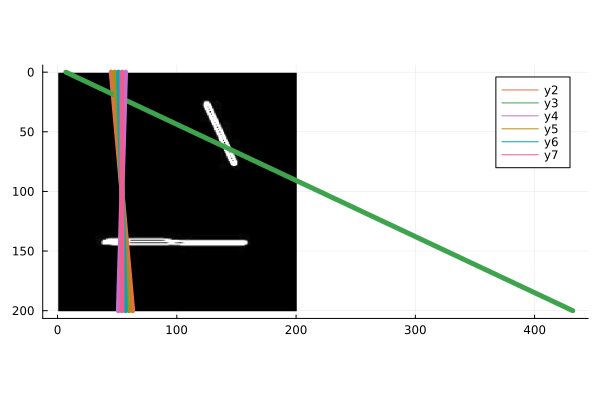

In [160]:
function plot_img_and_linear_functions(img, mn_list)
    p = plot(img)
    (h, w) = size(img)
    for (m, n) in mn_list

        x1 = -w ÷ 2
        x2 = w ÷ 2

        y1 = floor(Int, m * x1 - n)
        y2 = floor(Int, m * x2 - n)

        (x1, y1) = rel_pos_to_abs((x1, y1), (w, h))
        (x2, y2) = rel_pos_to_abs((x2, y2), (w, h))

        plot!([x1, x2], [y1, y2], linewidth=5)
    end
    p

end



plot_img_and_linear_functions(img, top_k_line_params)

## detecting the edges of some shapes

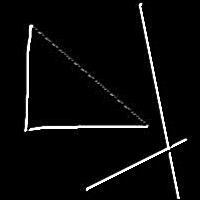

In [127]:
include("imageops.jl")
img = load("./images/input/geom.jpg")
img = Gray{Float32}.(img)
img = sobel(img)

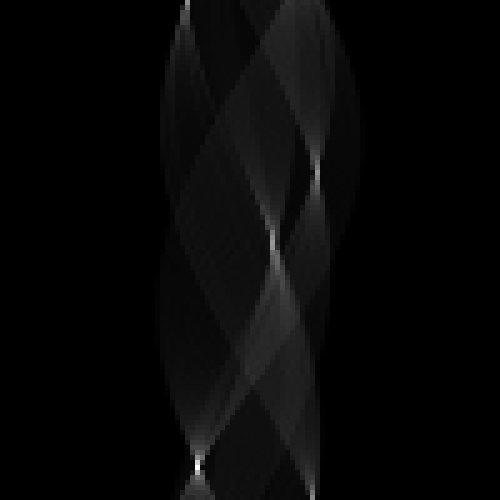

In [129]:
acc_matrix = hugh_transform_accumulator_matrix(img, (100,100))
imresize(Gray.(acc_matrix), (500, 500), method=Interpolations.Constant())

(phi, r, m, n) = (1.5707963267948966, 1.4142136815823854, -6.123233995736766e-17, 1.4142136815823854)
(phi, r, m, n) = (1.5393804002589986, 1.4142136815823854, -0.031426266043351254, 1.414911855170723)
(phi, r, m, n) = (2.9845130209103035, -2.8284270055369003, 6.3137515146750385, -18.080587323320987)
(phi, r, m, n) = (2.921681167838508, -2.8284270055369003, 4.4737428292115595, -12.965916282482326)
(phi, r, m, n) = (2.9530970943744053, -2.8284270055369003, 5.242183581113165, -15.09449867928493)


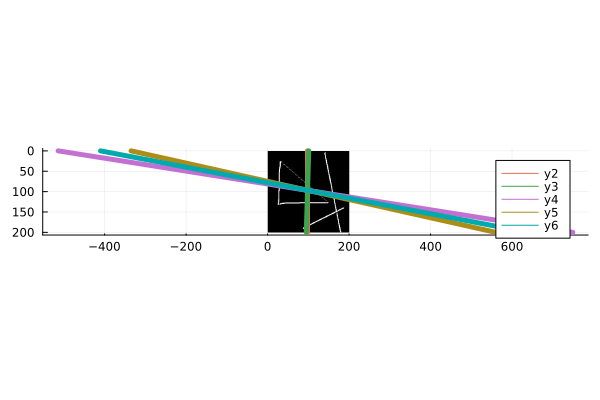

In [131]:
top_k_line_params = top_k_line_params_from_acc_matrix(acc_matrix, 5, size(sobel_img))
plot_img_and_linear_functions(img, top_k_line_params)